# Evaluation formative #5 - Solutions

**Rendre ce notebook par message Mio**
* Durée: 45 minutes

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 1 - Simulation de données

In [2]:
from sklearn.datasets import make_circles

In [3]:
N = 100
X, y = make_circles(n_samples=10*N, shuffle=True, noise=0.1, random_state=2021)

#### Affichage du jeu de données simulé

In [4]:
# Configuration de la visualisation
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set(rc={'figure.figsize':(10,10)})

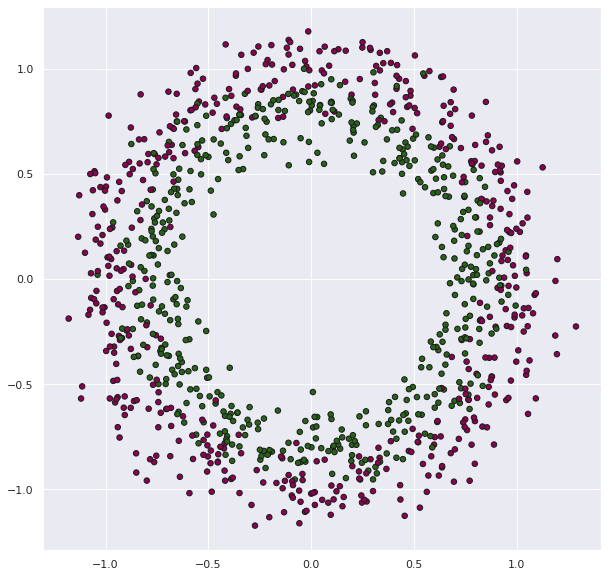

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', edgecolor='k', s=30)
plt.show()

### 2 - Préparation de données

<strong>
Séparation des données en train et validation
</strong>

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.6, random_state=2021)

In [7]:
import numpy as np

print('Classe négative')
print(f'Train {len(y_train) - np.sum(y_train)}') 
print(f'Val {len(y_val) - np.sum(y_val)}')

print('\nClasse positive')
print(f'Train {np.sum(y_train)}') 
print(f'Val {np.sum(y_val)}')

Classe négative
Train 306
Val 194

Classe positive
Train 294
Val 206


In [8]:
X_val.shape

(400, 2)

### 3 - Mise en oeuvre d'un classificateur à base de processus gaussiens

Mettre en oeuvre une recherche sur grille afin de trouver les meilleurs hyperparamètres d'une classification à base de processus gaussiens. L'estimateur à utiliser est le suivant:

[sklearn.gaussian_process.GaussianProcessClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier)

L'hyperparamètre à optimiser le noyau `kernel`. Effectuer une recherche pour un noyau "RBF" ayant les valeurs de `length_scale` de **0.8, 0.9, 1.0 et 1.1** et un noyau "Matern" ayant une valeur de `length_scale` de **1.0** et des valeurs de `nu` de **1.4, 1.5 et 1.6**

Ci-dessous la documention des noyaux à utiliser:
* [sklearn.gaussian_process.kernels.RBF](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html#sklearn.gaussian_process.kernels.RBF)
* [sklearn.gaussian_process.kernels.Matern](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Matern.html#sklearn.gaussian_process.kernels.Matern)

<h2 span style="color: red"> Utilisez un random_state de 2021</h2>

In [9]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [10]:
# Grid
parameters = {
    "kernel": [RBF(0.8), RBF(0.9), RBF(1.0), RBF(1.1), Matern(nu=1.4), Matern(nu=1.5), Matern(nu=1.6)],
}

clf_gpc = GaussianProcessClassifier(random_state=2021)

clf_gpc_grid = GridSearchCV(clf_gpc,
                            parameters,
                            cv=5,
                            scoring="roc_auc",
                            verbose=1, n_jobs=-1)

clf_gpc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=GaussianProcessClassifier(random_state=2021),
             n_jobs=-1,
             param_grid={'kernel': [RBF(length_scale=0.8),
                                    RBF(length_scale=0.9), RBF(length_scale=1),
                                    RBF(length_scale=1.1),
                                    Matern(length_scale=1, nu=1.4),
                                    Matern(length_scale=1, nu=1.5),
                                    Matern(length_scale=1, nu=1.6)]},
             scoring='roc_auc', verbose=1)

In [11]:
print(f'Meilleurs paramètres: {clf_gpc_grid.best_params_}')
print(f'Meilleur score (mean CV): {clf_gpc_grid.best_score_}')

Meilleurs paramètres: {'kernel': Matern(length_scale=1, nu=1.4)}
Meilleur score (mean CV): 0.911850313135431


In [14]:
clf_gpc_grid.best_estimator_.kernel_

Matern(length_scale=0.309, nu=1.4)

In [12]:
from helpers import plot_classifier

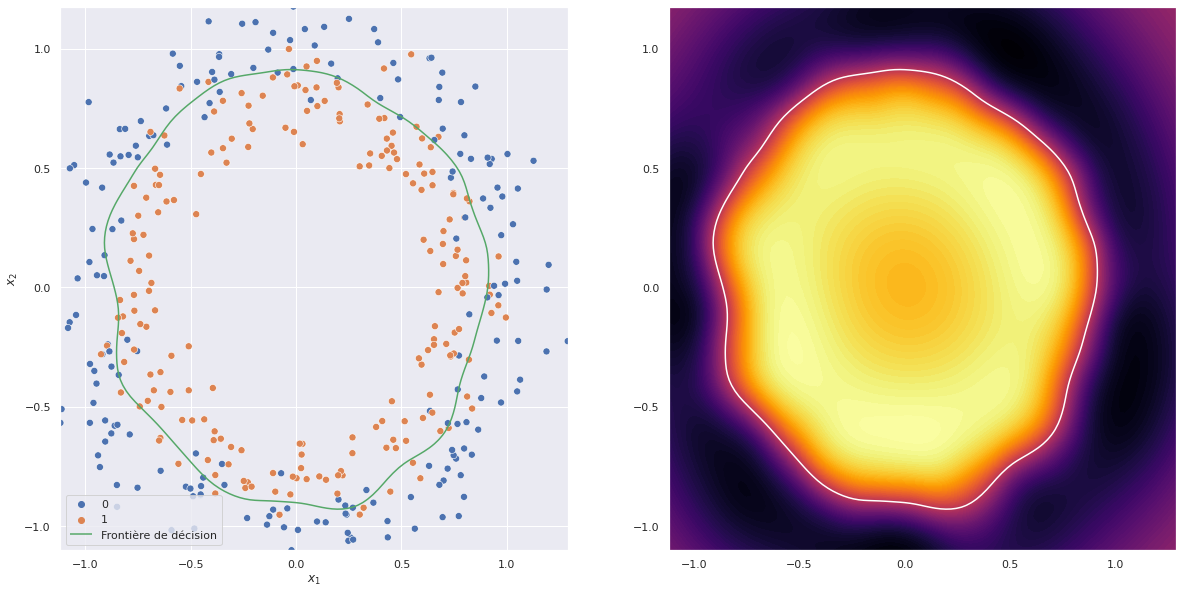

In [13]:
sns.set(rc={'figure.figsize':(20,10)})
plot_classifier(X_train, y_train, clf_gpc_grid.best_estimator_)

### Fin du Quiz